## Logistic Regression

Logistic regression is the base unit used in Neural networks. It is a clasifier that has a linear decision boundary. In other words it can only work well when data is linearly seperable as shown bellow:

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
iris = datasets.load_iris()
model = LogisticRegression(max_iter= 1000)

In [3]:
iris_2class = iris["data"][:100,:2] # only take two dimensions to simplify

In [4]:
label = iris["target"][:100]

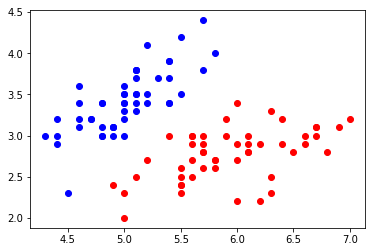

In [5]:
col = {1: "r", 0: "b"}
for i in range(len(iris_2class)):
    c = col[label[i]]
    x, y = iris_2class[i]
    plt.plot(x,y, "o" + c)

In [6]:
model.fit(iris_2class, label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
sum(model.predict(iris_2class) == label)*100.0 / len(label) # One instance classified incorrectly 

99.0

In [8]:
m1, m2 = model.coef_[0]
c1 =model.intercept_[0]
m1,m2,c1

(2.2165737556011873, -3.6915233706589068, -0.59901123865342454)

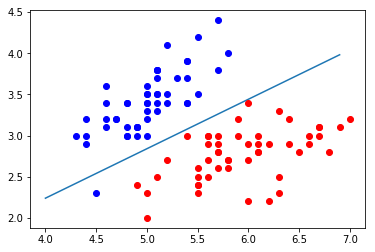

In [9]:
# plotting decision boundaries:

x = np.arange(4,7,0.1)
y = -(m1/m2)*x -(c1/m2)#])
plt.plot(x,y)
for i in range(len(iris_2class)):
    c = col[label[i]]
    x, y = iris_2class[i]
    plt.plot(x,y, "o" + c)

## Neural Networks

Neural networks are used when data is not linearly seperable. Just like logistic regression neural nets fit striaght lines however the main difference is that they fit several lines (forming poligons) that allow us to classify correctly non linearly seperable data.

The more Neurons (logistic regression units) the more lines we are fitting and the more complex shapes we can fit.

In [36]:
# compiling a keras network with topology 
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.np_utils import to_categorical 

model = Sequential() # ins
model.add(Dense(output_dim=3, input_dim=2)) # Hidden layer with 3 lines (3 neurons)
model.add(Activation("sigmoid"))
model.add(Dense(output_dim=1))
model.add(Activation("sigmoid"))

# compile model...
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


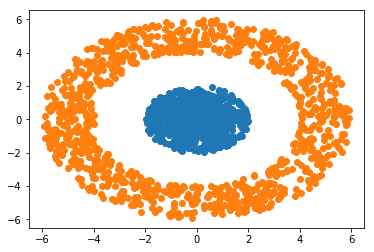

In [37]:
# Generating non linear data

def sample_circle_points(r1=6, size=1000, ring=0):
    theta = np.random.uniform(- np.pi, np.pi, size)
    r = np.random.uniform(r1-ring, r1, size=size)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return [x,y]

circle = sample_circle_points(r1=2, ring=2)
ring = sample_circle_points(ring=2)
labels = np.array( [0]*len(circle[0]) + [1]*len(ring[0]))
plt.plot(*(circle+["o"]) )
plt.plot(*(ring+["o"]) )

In [38]:
X= np.array([[x,y] for x,y in list(zip(*circle))] + [[i,j] for i,j in list(zip(*ring))])

In [43]:
# training net to 100* accuracy
model.fit(X, (labels), nb_epoch=200, batch_size=32)

Epoch 1/200
2000/2000 [==============================] - 0s - loss: 0.2061 - acc: 0.9470     
Epoch 2/200
2000/2000 [==============================] - 0s - loss: 0.2054 - acc: 0.9475     
Epoch 3/200
2000/2000 [==============================] - 0s - loss: 0.2047 - acc: 0.9475     

In [44]:
grads, intercepts = model.layers[0].get_weights() 
grads


array([[-0.02533619,  1.56212711, -1.51818466],
       [ 1.98637438,  1.41373563,  0.89575428]], dtype=float32)

0
1
2


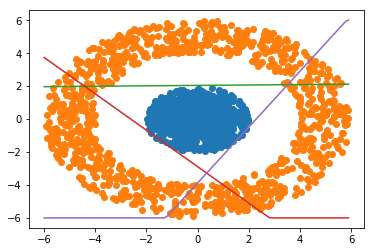

In [45]:
plt.plot(*(circle+["o"]) )
plt.plot(*(ring+["o"]) )
# Plotting hyperplanes of layer 1
for i in range(len(grads.T)):
    print(i)
    m1 = grads[0][i]
    m2 = grads[1][i]
    c1 = intercepts[i]
    x = np.arange(-6,6,0.1)
    y = np.clip(-(m1/m2)*x -(c1/m2),-6,6)
    plt.plot(x,y)
    

In [46]:
# meshgrid for all points on plain ... there is probably a nice numpy way of doing this
from itertools import chain
xx ,yy = np.meshgrid(np.arange(-6,6,0.1) , np.arange(-6,6,0.1))
X2 = np.array(list(chain(*[zip(i,j) for i,j in zip(xx, yy)])))

In [47]:
label = model.predict_classes(X2)
label2 = model.predict_classes(X)

1312/2000 [==================>...........] - ETA: 0s0s 

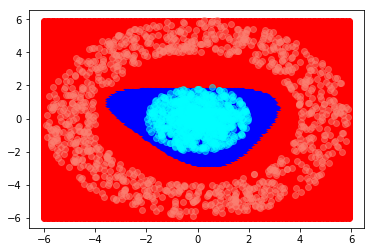

In [50]:
# plotting classification over meshgrid to portray 
# real picture of decision boundaries 

for i in range(len(X2)):
    c = col[label[i][0]]
    x, y = X2[i]
    plt.plot(x,y, "o" + c)
    

col2 = {1: "salmon", 0: "cyan"}
for i in range(len(X)):
    c = col2[label2[i][0]]
    x, y = X[i]
    plt.plot(x,y, "o" , color= c, alpha=0.5)


In [51]:
label = model.predict(X2)


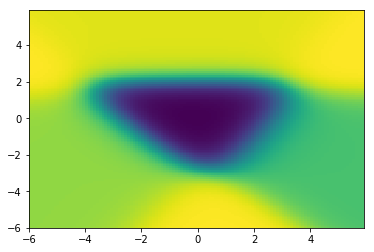

In [54]:
plt.pcolormesh(xx,yy, label.reshape(120,120))

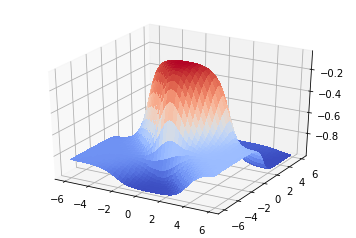

In [58]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(xx,yy, -1*label.reshape(120,120), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)